<div class="alert alert-block alert-info" align=left><b></b>
Human Activity Recognition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import os

In [2]:
os.chdir("C:\\Users\\user\\Desktop\\deep\\UCI HAR Dataset")

In [3]:
os.getcwd()

'C:\\Users\\user\\Desktop\\deep\\UCI HAR Dataset'

In [4]:
data = pd.read_csv('X_train.txt',sep = "\t",header = None)
data1 = pd.read_csv('y_train.txt',sep = "\t",header = None)
data2 = pd.read_csv('X_test.txt',sep = "\t",header = None)
data3 = pd.read_csv('y_test.txt',sep = "\t",header = None)
#subject_train  = pd.read_csv('subject_train.txt',header = None)
#subject_test = pd.read_csv('subject_test.txt',header = None)

In [5]:
X_tra = [[float(number) for number in data[0].iloc[line].split()] for line in range(len(data))]
X_te = [[float(number) for number in data2[0].iloc[line].split()] for line in range(len(data2))]
X_tr = pd.DataFrame(X_tra)
X_ts = pd.DataFrame(X_te)

In [6]:
features = pd.read_csv('features.txt',sep = "\t",header = None)
features['col_name'] = str(0)
for i in range(len(features)):
    words = features[0].iloc[i].split()
    features['col_name'].iloc[i] = words[1]

In [7]:
Features = features.drop([0], axis=1)

In [8]:
X_tr.columns = X_tr.columns[:0].tolist() + Features['col_name'].values.tolist()
X_ts.columns = X_ts.columns[:0].tolist() + Features['col_name'].values.tolist()
X_train = X_tr
X_test = X_ts
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)

X_train :  (7352, 561)
X_test :  (2947, 561)


In [9]:
y_train = data1.rename(columns = {0:"Activity"})
y_test = data3.rename(columns = {0:"Activity"})
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

y_train :  (7352, 1)
y_test :  (2947, 1)


In [10]:
# sub_train = subject_train.rename(columns = {0:'Subject'})
# sub_test = subject_test.rename(columns = {0:'Subject'})
# X_train['Subject'] = sub_train
# X_test['Subject'] = sub_test
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (7352, 561)
X_test :  (2947, 561)
y_train :  (7352, 1)
y_test :  (2947, 1)


In [11]:
y_train.head()

,Activity
0,5
1,5
2,5
3,5
4,5


In [12]:
y_train.dtypes

Activity    int64
dtype: object

In [13]:
y_train.Activity.replace([1,2,3,4,5,6],['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING'],inplace=True)
y_test.Activity.replace([1,2,3,4,5,6],['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING'],inplace=True)

In [14]:
y_train.head()

,Activity
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING


In [15]:
train = pd.concat([X_train,y_train],axis = 1)
test = pd.concat([X_test,y_test],axis = 1)

In [16]:
print('Train Shape : ',train.shape)
print('Test Shape : ',test.shape)

Train Shape :  (7352, 562)
Test Shape :  (2947, 562)


In [17]:
train.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [18]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


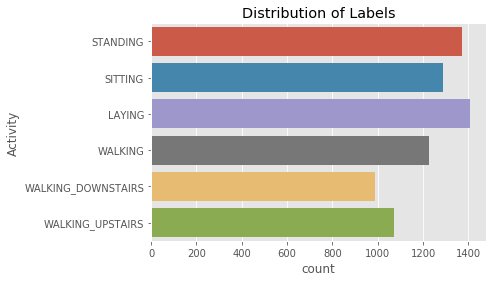

In [19]:
ax = sns.countplot(y = train['Activity'])
ax.set_title('Distribution of Labels')
plt.show()

In [20]:
y_train=train['Activity']
X_train=train.drop('Activity',axis=1)
print('X_train : ',X_train.shape)
print('y_train : ',y_train.shape)

X_train :  (7352, 561)
y_train :  (7352,)


In [21]:
y_test=test['Activity']
X_test=test.drop('Activity',axis=1)
print('X_test : ',X_test.shape)
print('y_test : ',y_test.shape)

X_test :  (2947, 561)
y_test :  (2947,)


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying LDA

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = None)
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)

C:\Users\user\Anaconda3\envs\py36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [24]:
lda_var_ratios = lda.explained_variance_ratio_

In [25]:
lda_var_ratios

array([0.73179996, 0.17624642, 0.05461643, 0.02824873, 0.00908846])

In [26]:
X_train1 = pd.DataFrame(X_train, columns=['lda1', 'lda2', 'lda3', 'lda4', 'lda5'])
X_train1.head()

,lda1,lda2,lda3,lda4,lda5
0,-10.131303,-8.600555,0.521162,1.090378,4.051475
1,-9.774950,-6.967300,0.392349,-0.467446,2.314259
2,-9.767446,-7.145707,-0.195444,0.005705,3.795791
3,-9.745219,-8.133894,0.168621,-0.064691,1.886819
4,-8.886116,-7.619552,0.569457,-0.345804,2.563435


In [60]:
X_train1.columns

Index(['lda1', 'lda2', 'lda3', 'lda4', 'lda5'], dtype='object')

In [86]:
labels = train['Activity']

In [87]:
labels.value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: Activity, dtype: int64

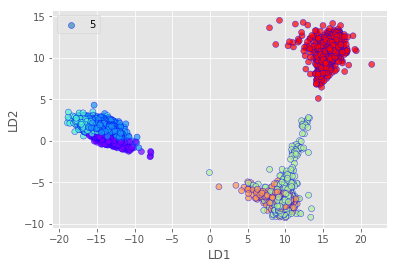

In [102]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(X_train1['lda1'],X_train1['lda2'],c=labels,cmap='rainbow',alpha=0.7,edgecolors='b')
plt.legend(labels)

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from datetime import datetime

sv = SVC()
rf = RandomForestClassifier()

param_grid_rf = {"n_estimators": [30,50,60],
                 "max_depth": [2,3,5,7],
                 "min_samples_leaf": [2, 4]}

param_grid_sv = {'kernel': ['rbf','linear'], 
                  'gamma': [1e-3, 1e-4],
                  'C'    : [1, 10, 100, 1000]}

classifiers = [['Random_Forest_Tuned : ',GridSearchCV(rf,param_grid=param_grid_rf,cv=5,scoring='accuracy')],
               ['Xg_boost : ',XGBClassifier()],
               ['Bagging Classifier : ',BaggingClassifier()],
               ['Support Vector Machines_Tuned : ',GridSearchCV(sv,param_grid=param_grid_sv,cv=5,scoring='accuracy')]]

# class_predictions = []
for name,model in classifiers:
    model=model
    start_time = datetime.now()
    model.fit(X_train,y_train)
    predictions = model.predict(X_train)
    predictions1 = model.predict(X_test)
#   class_predictions.append(accuracy_score(y_test,predictions))
    print(f'{name}_Train_Accuracy :',accuracy_score(y_train,predictions))
    print(f'{name}_Test_Accuracy :',accuracy_score(y_test,predictions1))
    end_time = datetime.now()
    print('Duration: {}'.format(end_time - start_time))
    print('--------------------------------------------------')

Random_Forest_Tuned : _Train_Accuracy : 0.9870783460282916
Random_Forest_Tuned : _Test_Accuracy : 0.9606379368849678
Duration: 0:01:03.454630
--------------------------------------------------
Xg_boost : _Train_Accuracy : 0.9912948857453754
Xg_boost : _Test_Accuracy : 0.9538513742789277
Duration: 0:00:06.451369
--------------------------------------------------
Bagging Classifier : _Train_Accuracy : 0.9990478781284005
Bagging Classifier : _Test_Accuracy : 0.9626739056667798
Duration: 0:00:00.353020
--------------------------------------------------
Support Vector Machines_Tuned : _Train_Accuracy : 0.9870783460282916
Support Vector Machines_Tuned : _Test_Accuracy : 0.9643705463182898
Duration: 0:00:48.078750
--------------------------------------------------


#### OneHotEncoding for y_train and y_test

In [23]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [24]:
X_test.shape

(2947, 5)

In [25]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(64,activation='relu',input_dim=5))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                384       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 4,934
Trainable params: 4,934
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(X_train,y_train,epochs=50,batch_size=128,validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 7352 samples, validate on 2947 samples
Epoch 1/50
7352/7352 [==============================] - 2s 318us/step - loss: 0.7118 - acc: 0.7848 - val_loss: 0.1087 - val_acc: 0.9623
Epoch 2/50
7352/7352 [==============================] - 0s 26us/step - loss: 0.1557 - acc: 0.9486 - val_loss: 0.1099 - val_acc: 0.9613
Epoch 3/50
7352/7352 [==============================] - 0s 26us/step - loss: 0.1161 - acc: 0.9657 - val_loss: 0.1187 - val_acc: 0.9610
Epoch 4/50
7352/7352 [==============================] - 0s 26us/step - loss: 0.1048 - acc: 0.9672 - val_loss: 0.1082 - val_acc: 0.9654
Epoch 5/50
7352/7352 [==============================] - 0s 26us/step - loss: 0.0927 - acc: 0.9687 - val_loss: 0.1212 - val_acc: 0.9627
Epoch 6/50
7352/7352 [==============================] - 0s 26us/step - loss: 0.0842 - acc: 0.9723 - val_loss: 0.1234 - val_acc: 0.9617
Epoch 7/50
7352/7352 [==============================] - 0s 26us/step - loss: 0.0821 - acc: 0.